# EDA and Transformation

**Goal: To predict the housing prices based on various features (i.e., # of Bedrooms, # of Bathrooms, Floor Area, Land Area)**

Intuitively, as the number or amount of the aforementioned features increase, the price will increase. However, what we aim to obtain is the estimated price.

For this notebook, it we will perform Exploratory Data Analysis using the cleaned data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [2]:
DATASET_INTERIM_PATH = r"data\interim"

In [3]:
df = pd.read_csv(os.path.join("..", DATASET_INTERIM_PATH, 'cleaned_data.csv'))

## Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1323 non-null   float64
 1   Bedrooms    1323 non-null   float64
 2   Bathrooms   1323 non-null   float64
 3   Floor Area  1323 non-null   float64
 4   Land Area   1323 non-null   float64
 5   Region      1323 non-null   object 
 6   Urbanicity  1323 non-null   object 
dtypes: float64(5), object(2)
memory usage: 72.5+ KB


In [5]:
df.describe()

,Price,Bedrooms,Bathrooms,Floor Area,Land Area
count,1.323000e+03,1323.000000,1323.000000,1323.000000,1323.000000
mean,3.349000e+07,3.599395,2.972033,212.807090,239.103409
std,1.049643e+08,1.305081,1.854272,234.929025,559.314755
min,3.000000e+05,1.000000,1.000000,22.000000,27.000000
25%,5.183808e+06,3.000000,2.000000,66.000000,80.000000
50%,9.500000e+06,3.000000,3.000000,142.000000,120.000000
75%,2.500000e+07,4.000000,4.000000,250.000000,220.000000
max,2.500000e+09,13.000000,43.000000,2200.000000,10000.000000


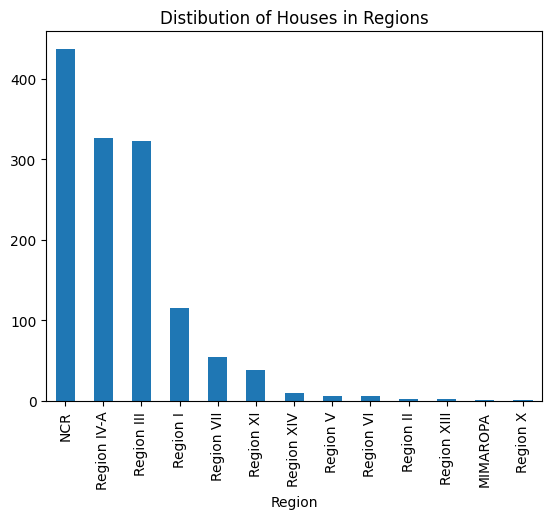

In [6]:
plt.title("Distibution of Houses in Regions")
df['Region'].value_counts().plot(kind='bar')
plt.show()

Most of the houses in the dataset are from NCR, Region IV-A, and Region III.

## Bivariate Analysis on Numerical Features with respect to Numerical Target

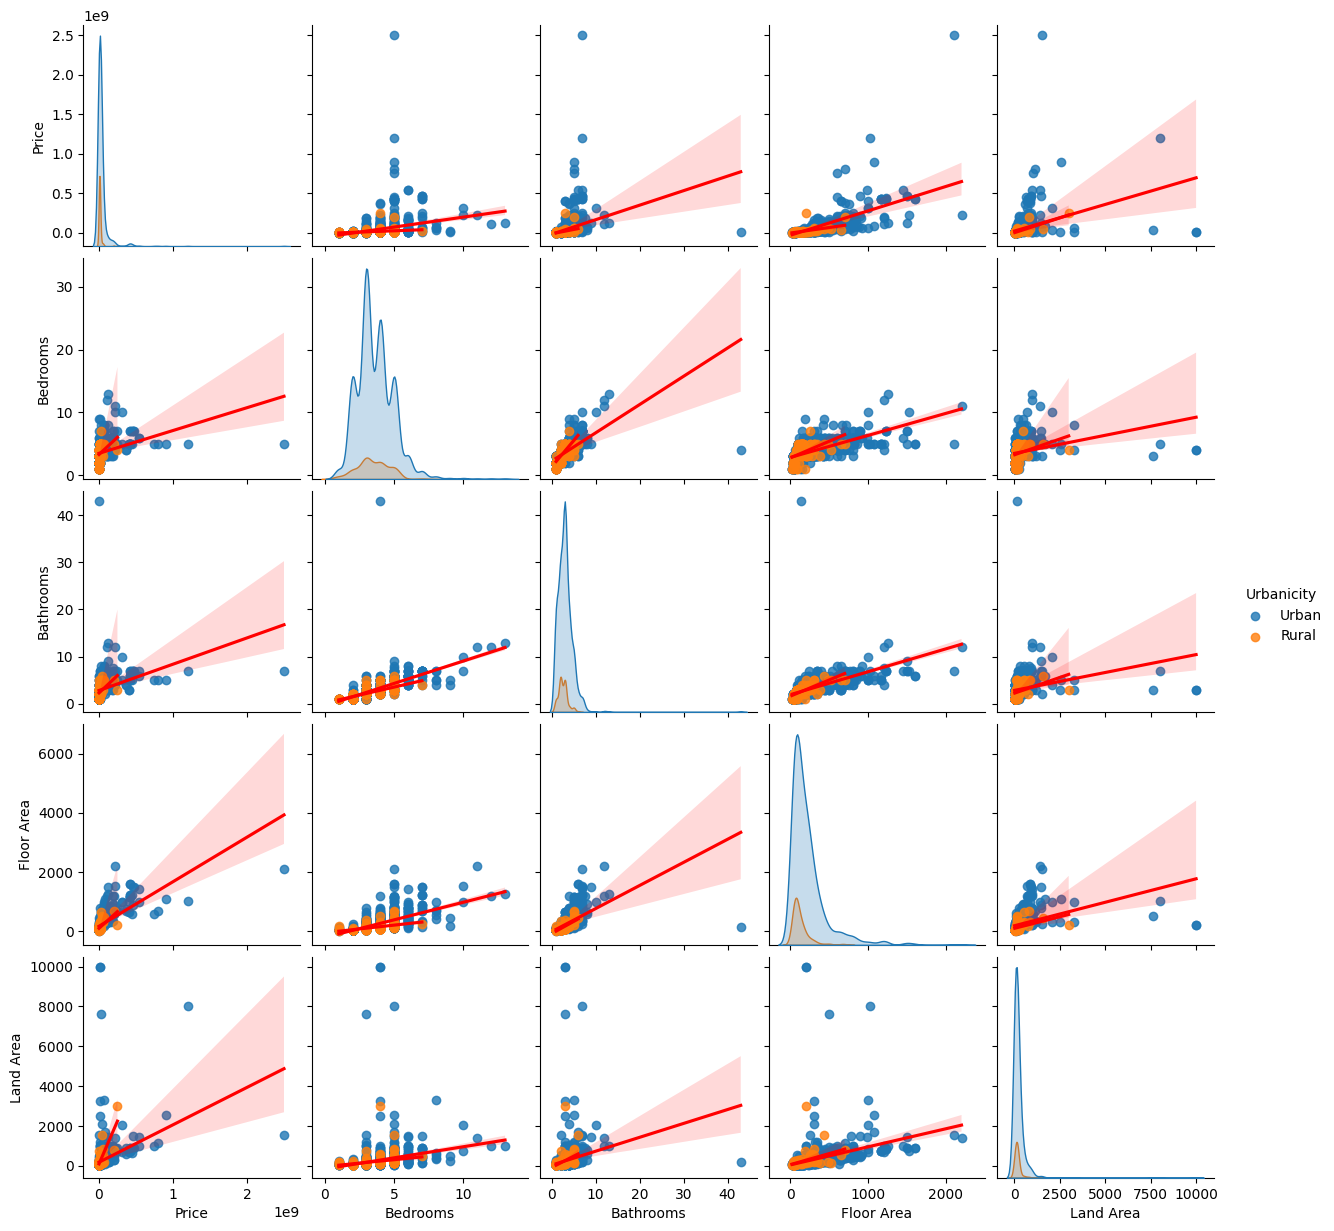

In [7]:
sns.pairplot(df, hue='Urbanicity', kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

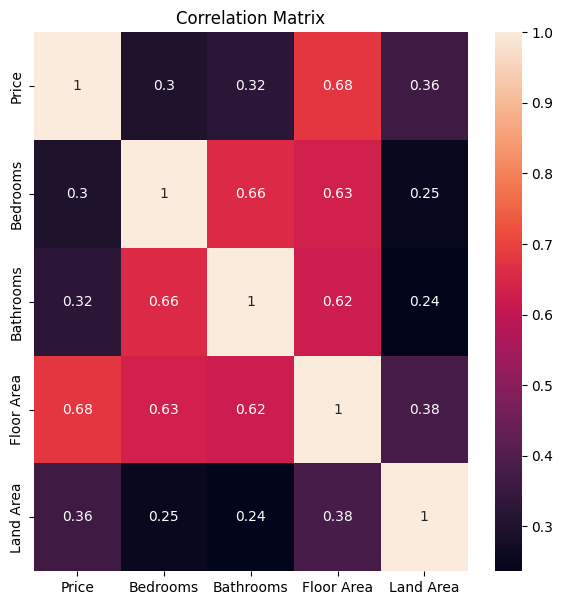

In [8]:
plt.figure(figsize=(7, 7))
sns.heatmap(df[['Price', 'Bedrooms', 'Bathrooms', 'Floor Area', 'Land Area']].corr(method='pearson'), annot=True)
plt.title("Correlation Matrix")
plt.show()

* With respect to the target variable (i.e., Price), all numerical features are positively correlated. However, they magnitude is relatively low especially for the number of bedrooms, number of bathrooms, and land area.
* The numerical feature with the most correlation with the target is the floor area.
* These correlation coefficients can be observed on the red regression line on the first row of the pairplot generated.
* However, we can still gain some intuition that the more bedrooms and bathrooms there are and the larger the floor and land area are, the higher the price will be.

## Bivariate Analysis on Categorical Features with respect to Numerical Target

### Urbanicity

To group the records by their location into larger groups, Urbanicity is used instead of Region.

Note: Refer to `./notebooks/preprocessing_1.ipynb`

In [9]:
df_copy = df.copy()

In [10]:
df_copy['Urbanicity'].value_counts()

Urbanicity
Urban    1180
Rural     143
Name: count, dtype: int64

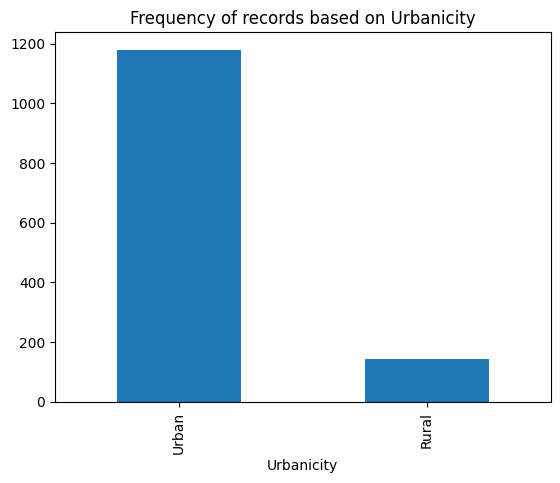

In [11]:
plt.title("Frequency of records based on Urbanicity")
df_copy['Urbanicity'].value_counts().plot(kind='bar')
plt.show()

* The records are imbalanced based on Urbanicity. Even if the data is grouped by the three major islands (i.e., Luzon, Visayas, Mindanao), it will still be imbalanced because the data scraped seems to contain more houses from NCR, Region IV-A, and Region III which are regions that are increasingly becoming urbanized.

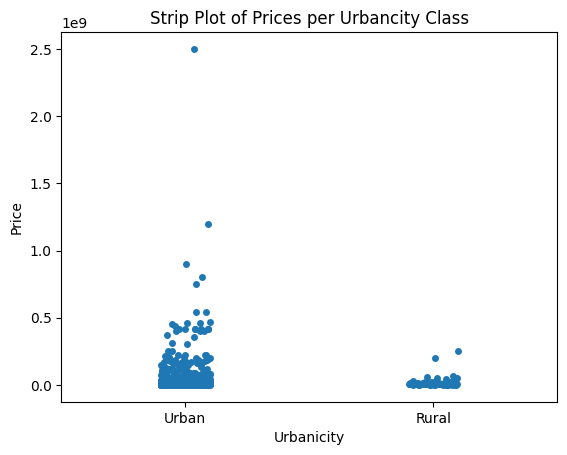

In [12]:
plt.title("Strip Plot of Prices per Urbancity Class")
sns.stripplot(df_copy, x='Urbanicity', y='Price')
plt.show()

* The data points for both urbanicity classes are concentrated on the lower bound of the price range. However, the range of housing prices on Urban classes is larger compared to Rural.
* This difference in the range might help with prediction of housing prices. 

## Outlier Removal and Log Transformation

* Removal of Outliers - Used to correct the data and remove the effects of extreme data points on the modeling. Outliers that are typically removed are data input errors such as typos or errors in the instruments used to gather the data. For this situtation, I don't have a way to determine the correctness of the values as these were scraped on the Internet and the data were provided by the users themselves. For the numerical features including the target feature, the only anomaly or outlier removal I can perform is when the data point is negative because there are no negative house prices, number of bedrooms, land area, etc.

* Log Transformation - Used to make the distribution more normal for highly skewed data distribution. I will add this as a pipeline step during training and hyperparameter optimization. Other transformation techniques can be also used such as Yeo-Johnson and Box-Cox.

### Removal of Outliers (Optional)

* This is only for demonstration purposes. It is optional.
* I did not apply this to the data because there is no way for me to ascertain whether values are incorrectly provided by sellers from the data that was scraped by the source.

In [13]:
df_outlier = df.copy()

In [14]:
def plot_upper_lower_bounds_boxplot(ax, data):
    q1 = np.percentile(data, 25, method='midpoint')
    q3 = np.percentile(data, 75, method='midpoint')

    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)

    ax.axhline(y=upper, color='red', linestyle='--')
    ax.axhline(y=lower, color='red', linestyle='--')

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U5'), dtype('<U5')) -> None

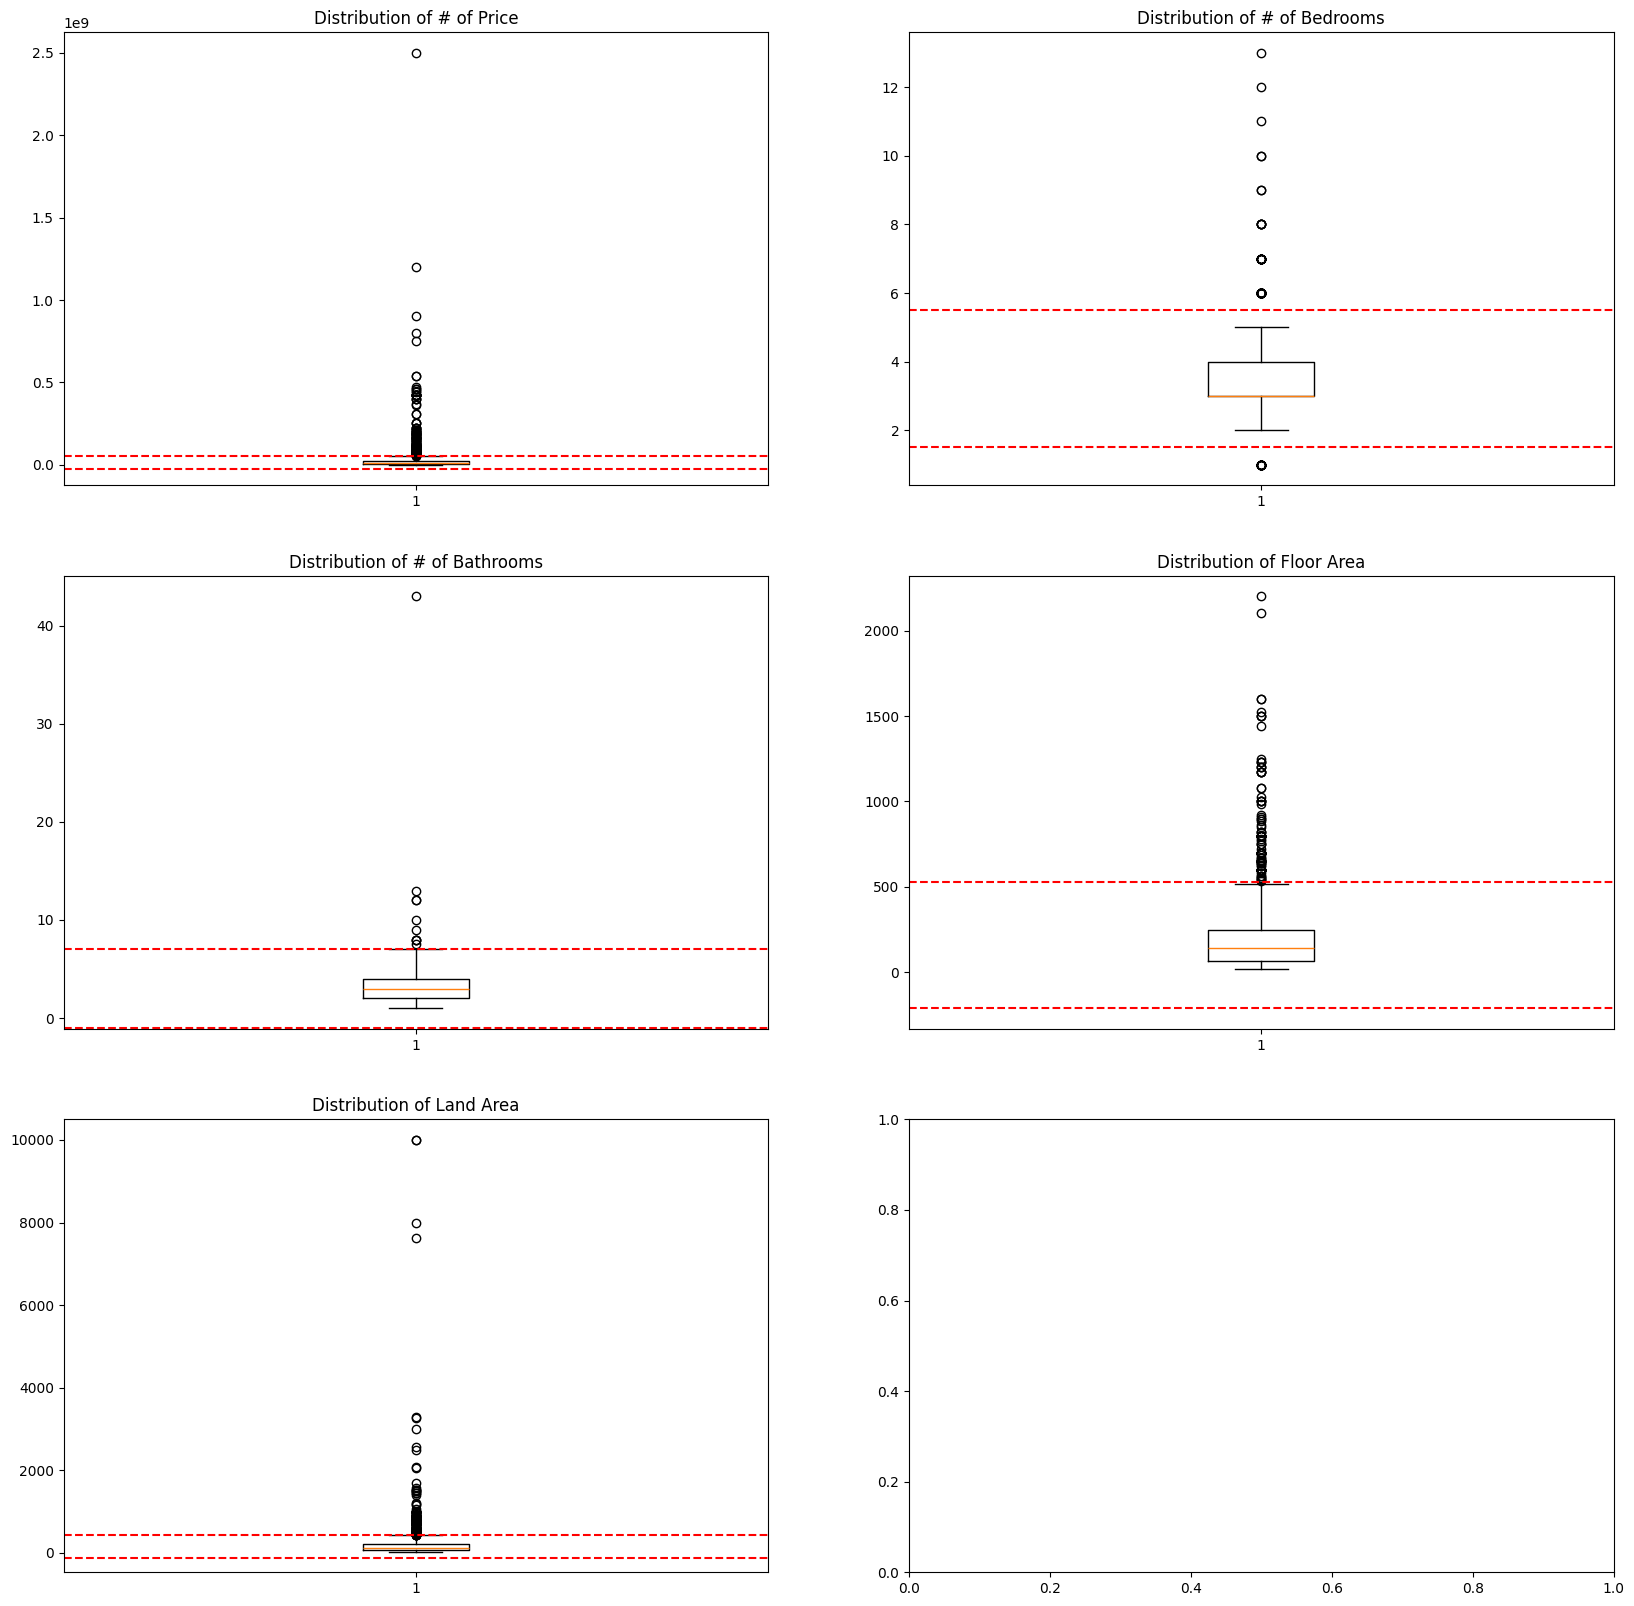

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

axes[0,0].boxplot(df_outlier['Price'])
axes[0,0].set_title('Distribution of # of Price')
axes[0,1].boxplot(df_outlier['Bedrooms'])
axes[0,1].set_title('Distribution of # of Bedrooms')
axes[1,0].boxplot(df_outlier['Bathrooms'])
axes[1,0].set_title('Distribution of # of Bathrooms')
axes[1,1].boxplot(df_outlier['Floor Area'])
axes[1,1].set_title('Distribution of Floor Area')
axes[2,0].boxplot(df_outlier['Land Area'])
axes[2,0].set_title('Distribution of Land Area')

for col, ax in zip(df_outlier.drop(['Region'], axis=1).columns, axes.flat):
    plot_upper_lower_bounds_boxplot(ax, df_outlier[col])

plt.show()

Other features including the house price are negatively skewed. The mode and median are less than the mean.
There seems to be a lot of outliers.

In [ ]:
def remove_outliers(col):
    q1 = np.percentile(df_outlier[col], 25, method='midpoint')
    q3 = np.percentile(df_outlier[col], 75, method='midpoint')

    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)

    upper_indices = np.where(df_outlier[col] >= upper)[0]
    lower_indices = np.where(df_outlier[col] <= lower)[0]

    try:
        df_outlier.drop(index=upper_indices, inplace=True)
        df_outlier.drop(index=lower_indices, inplace=True)
        df_outlier.reset_index(drop=True, inplace=True)
    except Exception as e:
        print(f"Error: {e}")
    
    print(f"Dropping: {len(upper_indices) + len(lower_indices)} rows in {col}")

In [ ]:
for col in df_outlier.drop(['Region', 'Urbanicity'], axis=1).columns:
    remove_outliers(col)

Dropping: 147 rows in Price
Dropping: 59 rows in Bedrooms
Dropping: 57 rows in Bathrooms
Dropping: 10 rows in Floor Area
Dropping: 64 rows in Land Area


In [ ]:
df_outlier.shape

(986, 6)

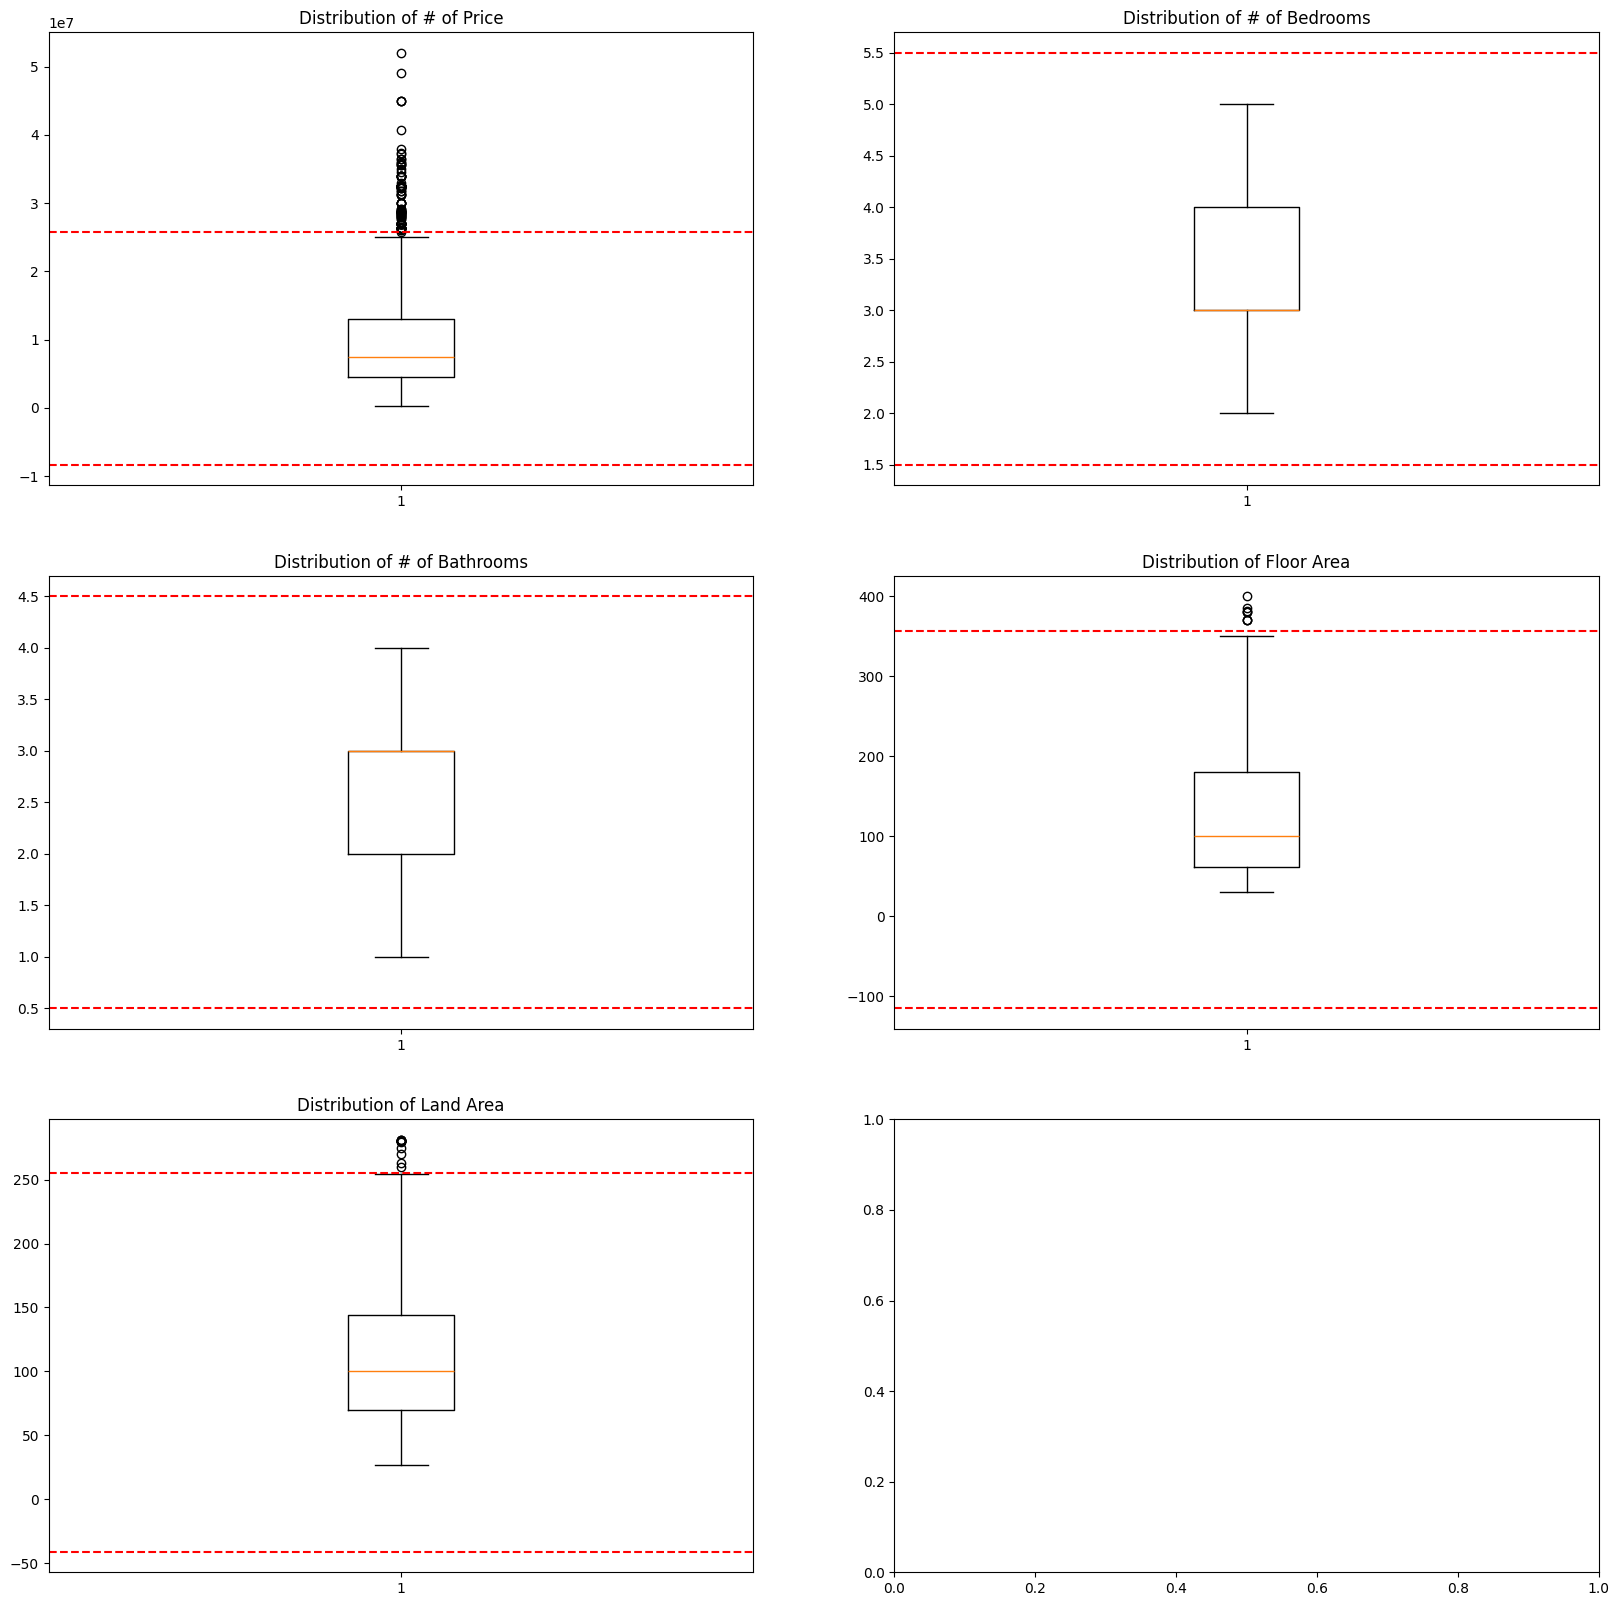

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

axes[0,0].boxplot(df_outlier['Price'])
axes[0,0].set_title('Distribution of # of Price')
axes[0,1].boxplot(df_outlier['Bedrooms'])
axes[0,1].set_title('Distribution of # of Bedrooms')
axes[1,0].boxplot(df_outlier['Bathrooms'])
axes[1,0].set_title('Distribution of # of Bathrooms')
axes[1,1].boxplot(df_outlier['Floor Area'])
axes[1,1].set_title('Distribution of Floor Area')
axes[2,0].boxplot(df_outlier['Land Area'])
axes[2,0].set_title('Distribution of Land Area')

for col, ax in zip(df_outlier.drop(['Region'], axis=1).columns, axes.flat):
    plot_upper_lower_bounds_boxplot(ax, df_outlier[col])

plt.show()

In [ ]:
df_outlier

,Price,Bedrooms,Bathrooms,Floor Area,Land Area,Region
0,9500000.0,4.0,3.0,144.00,136.0,Region IV-A
1,4400000.0,3.0,2.0,63.20,80.0,Region III
2,7810000.0,5.0,3.0,100.00,110.0,Region III
3,3275000.0,2.0,1.0,40.32,78.4,Region XI
4,1800000.0,2.0,2.0,52.00,40.0,Region III
...,...,...,...,...,...,...
981,52000000.0,3.0,3.0,380.00,162.3,Region I
982,13000000.0,4.0,3.0,230.00,150.0,Region IV-A
983,4500000.0,3.0,2.0,90.00,55.0,Region IV-A
984,45000000.0,4.0,3.0,370.00,200.0,NCR


### Log Transformation (Demonstration)

This will be applied on the data as a preprocessing stage in the pipeline demonstrated in `training_and_eval.ipynb`

In [27]:
df_log = df.copy()

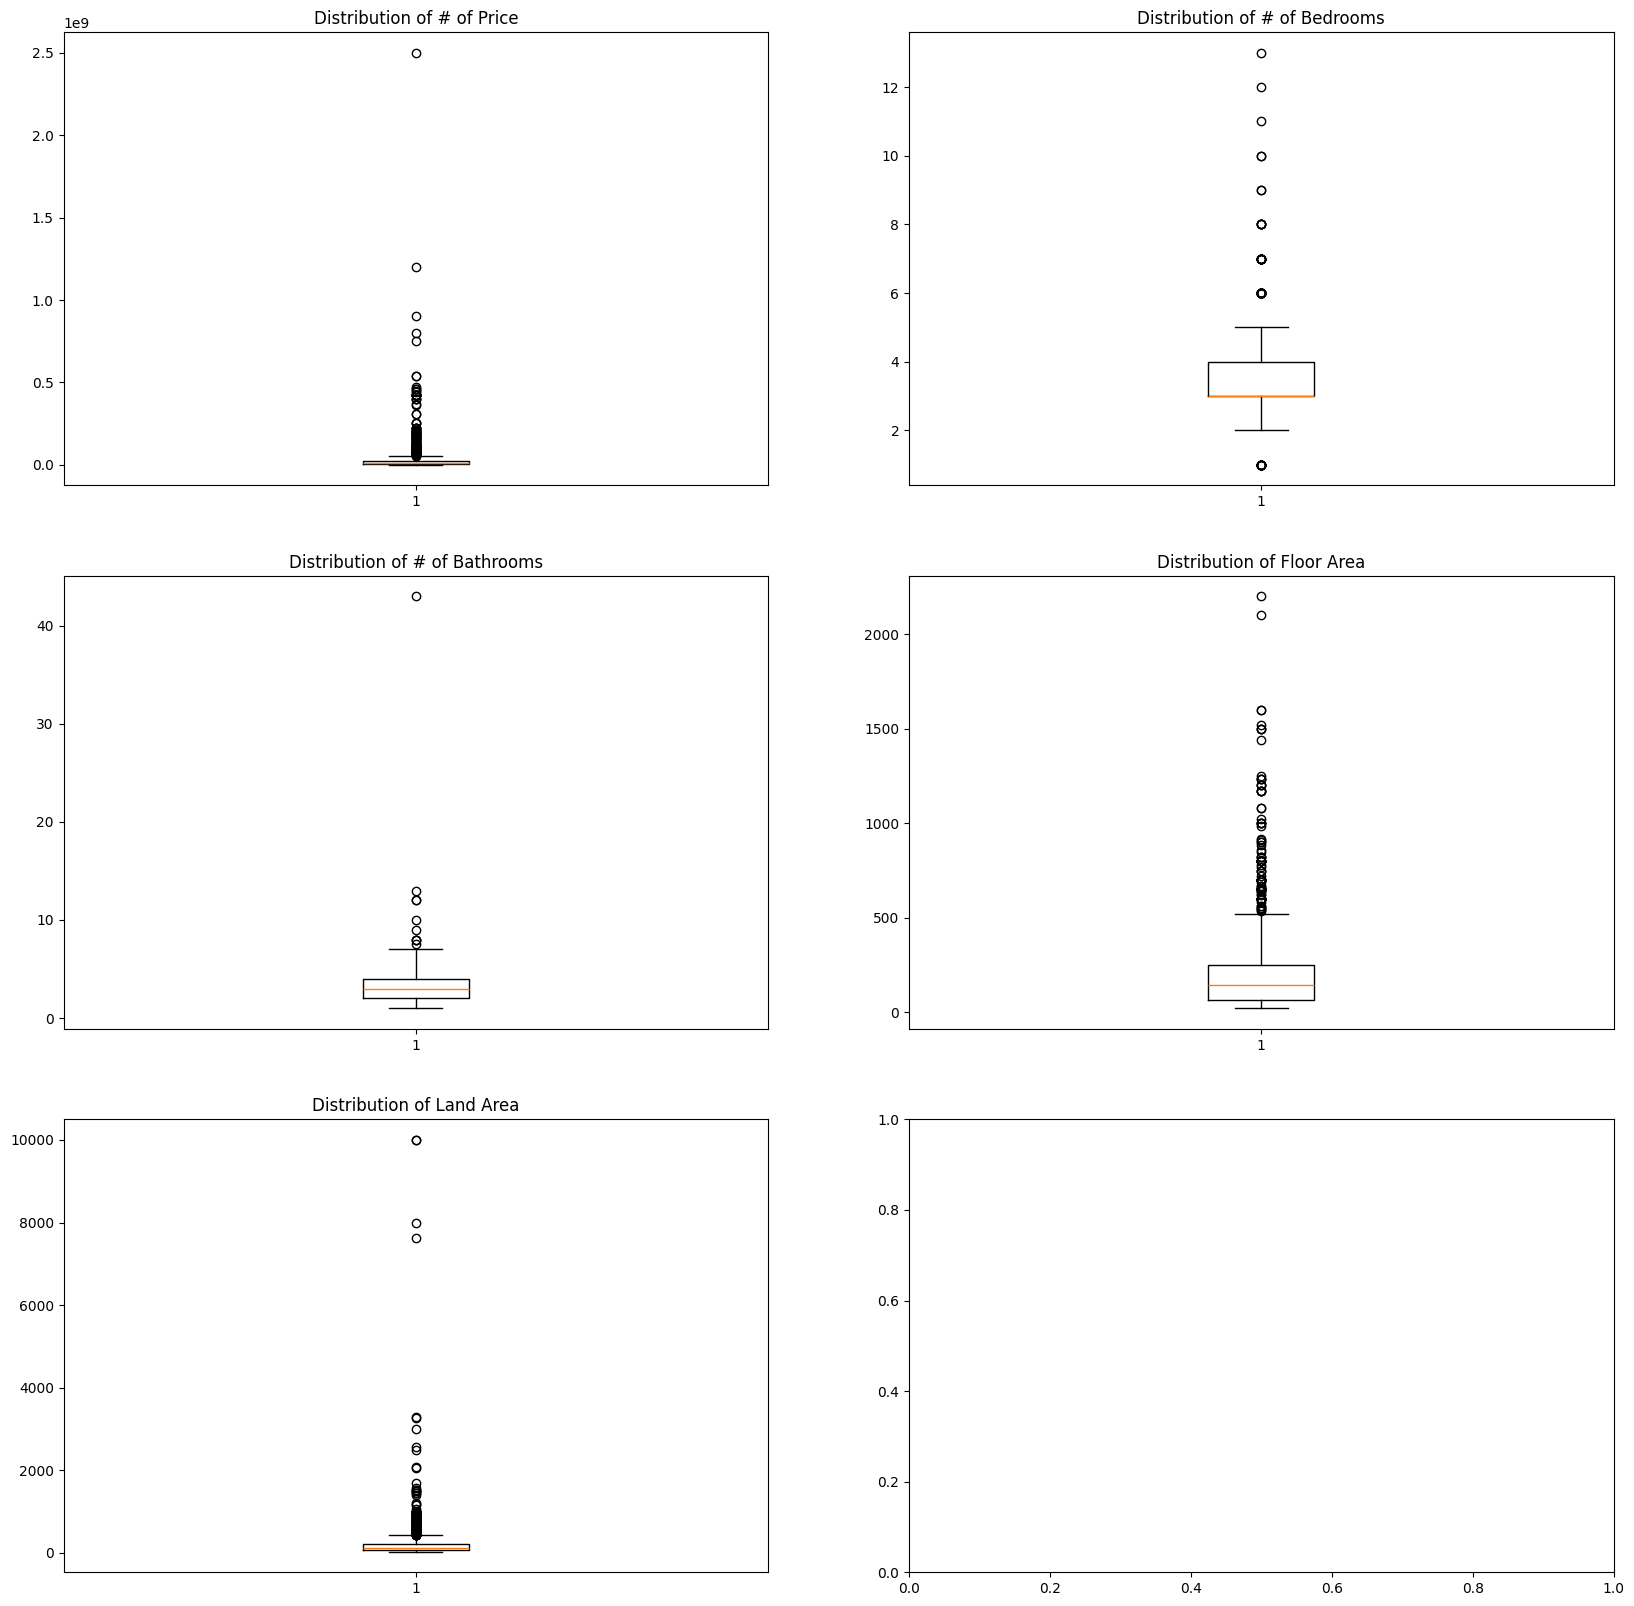

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

axes[0,0].boxplot(df_log['Price'])
axes[0,0].set_title('Distribution of # of Price')
axes[0,1].boxplot(df_log['Bedrooms'])
axes[0,1].set_title('Distribution of # of Bedrooms')
axes[1,0].boxplot(df_log['Bathrooms'])
axes[1,0].set_title('Distribution of # of Bathrooms')
axes[1,1].boxplot(df_log['Floor Area'])
axes[1,1].set_title('Distribution of Floor Area')
axes[2,0].boxplot(df_log['Land Area'])
axes[2,0].set_title('Distribution of Land Area')

plt.show()

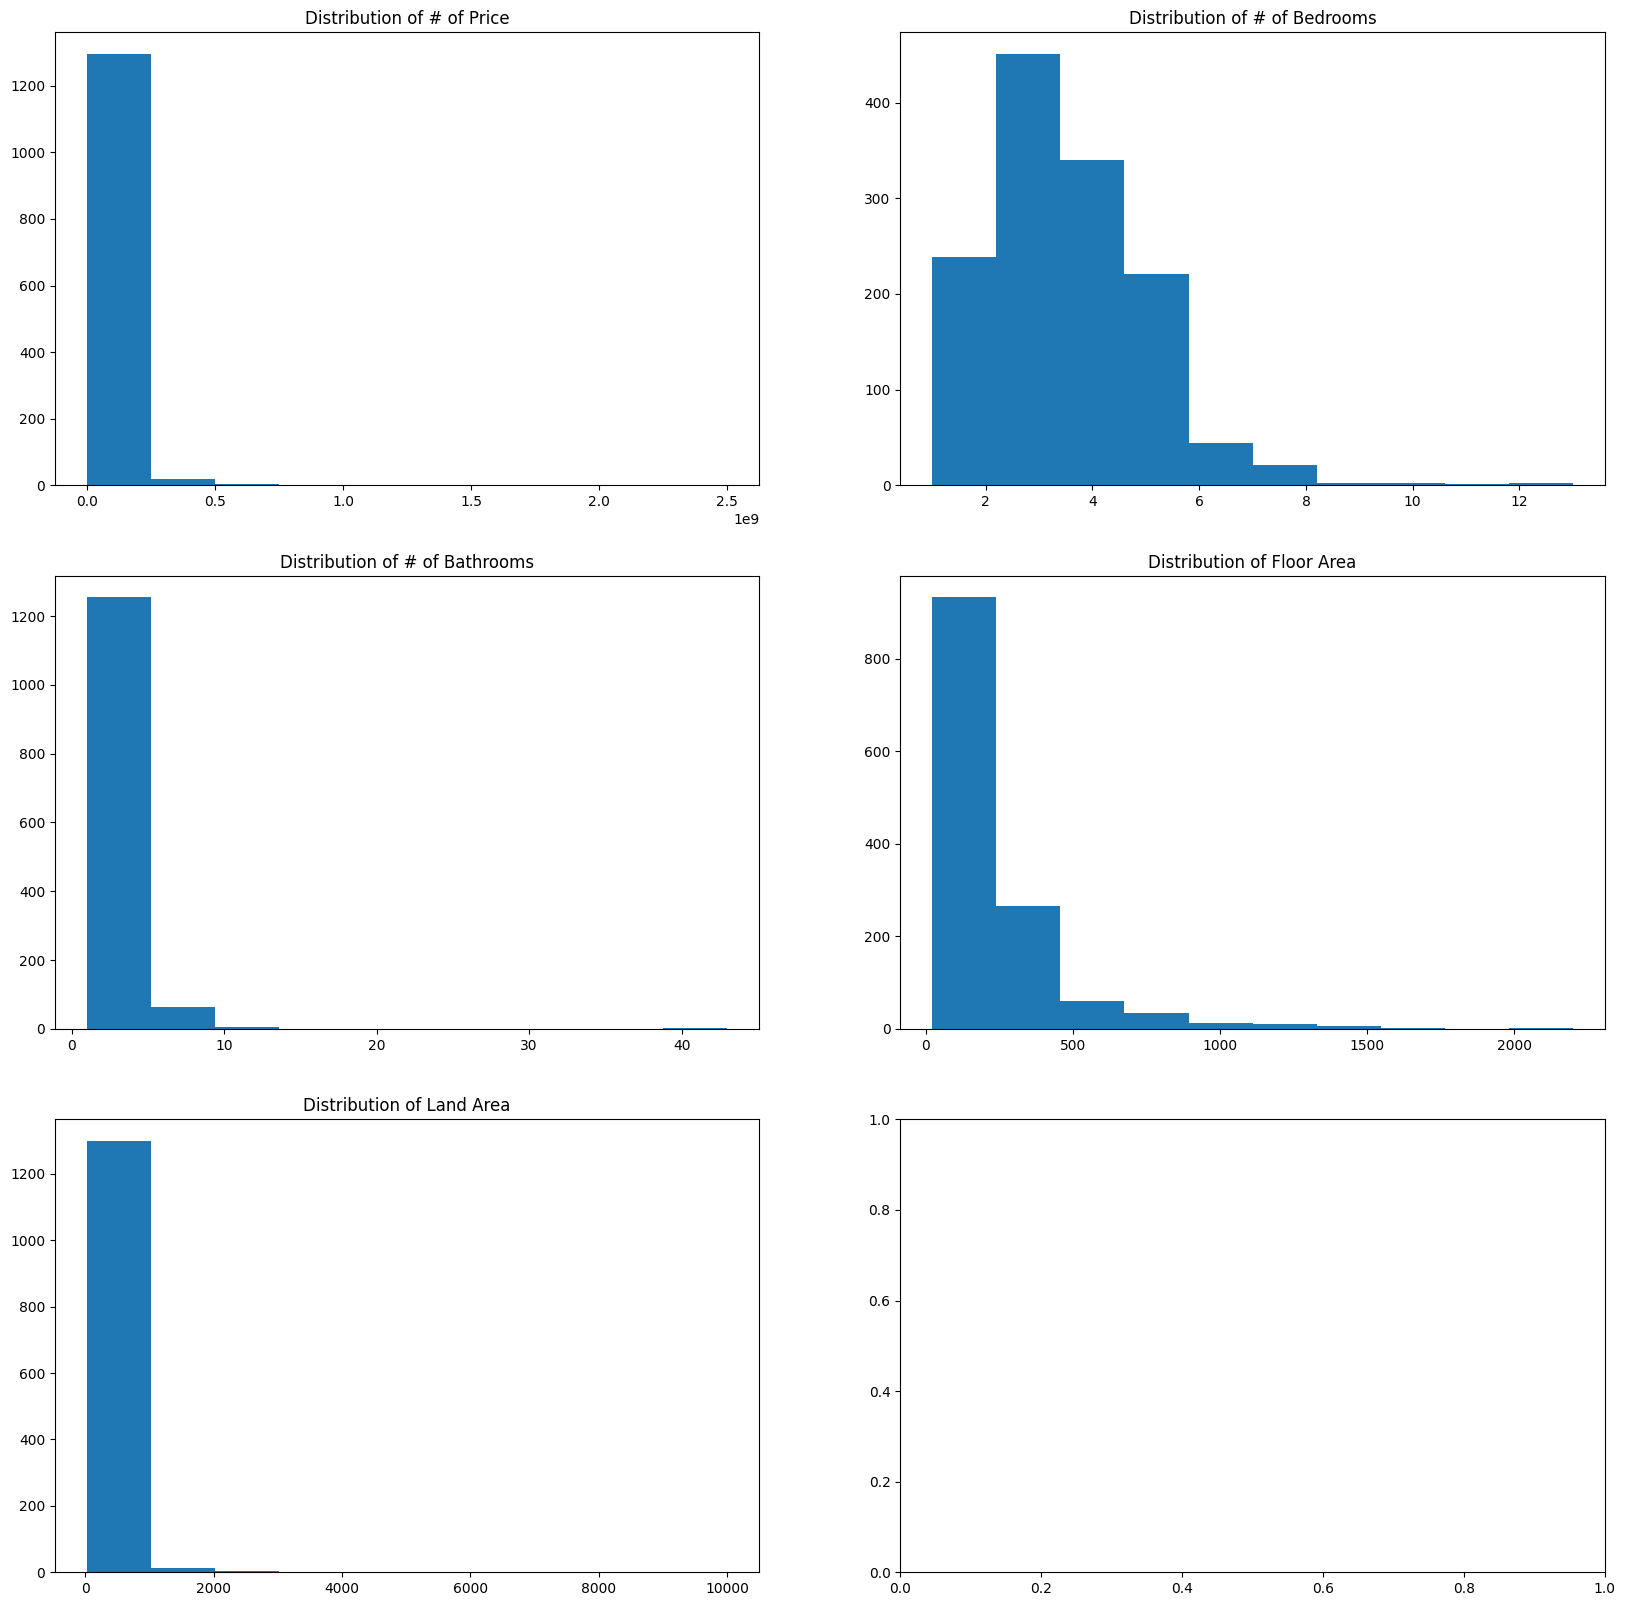

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

axes[0,0].hist(df_log['Price'])
axes[0,0].set_title('Distribution of # of Price')
axes[0,1].hist(df_log['Bedrooms'])
axes[0,1].set_title('Distribution of # of Bedrooms')
axes[1,0].hist(df_log['Bathrooms'])
axes[1,0].set_title('Distribution of # of Bathrooms')
axes[1,1].hist(df_log['Floor Area'])
axes[1,1].set_title('Distribution of Floor Area')
axes[2,0].hist(df_log['Land Area'])
axes[2,0].set_title('Distribution of Land Area')

plt.show()

In [31]:
cols = ['Bedrooms', 'Bathrooms', 'Floor Area', 'Land Area']

for col in cols:
    df_log[col] = np.log(df_log[col])

In [32]:
df_log

,Price,Bedrooms,Bathrooms,Floor Area,Land Area,Region,Urbanicity
0,9500000.0,1.386294,1.098612,4.969813,4.912655,Region IV-A,Urban
1,4400000.0,1.098612,0.693147,4.146304,4.382027,Region III,Urban
2,7810000.0,1.609438,1.098612,4.605170,4.700480,Region III,Urban
3,3275000.0,0.693147,0.000000,3.696848,4.361824,Region XI,Urban
4,1800000.0,0.693147,0.693147,3.951244,3.688879,Region III,Urban
...,...,...,...,...,...,...,...
1318,16000000.0,1.609438,0.693147,5.192957,6.291569,Region IV-A,Urban
1319,4500000.0,1.098612,0.693147,4.499810,4.007333,Region IV-A,Urban
1320,45000000.0,1.386294,1.098612,5.913503,5.298317,NCR,Urban
1321,78000000.0,1.609438,1.609438,6.711740,6.320768,Region IV-A,Urban


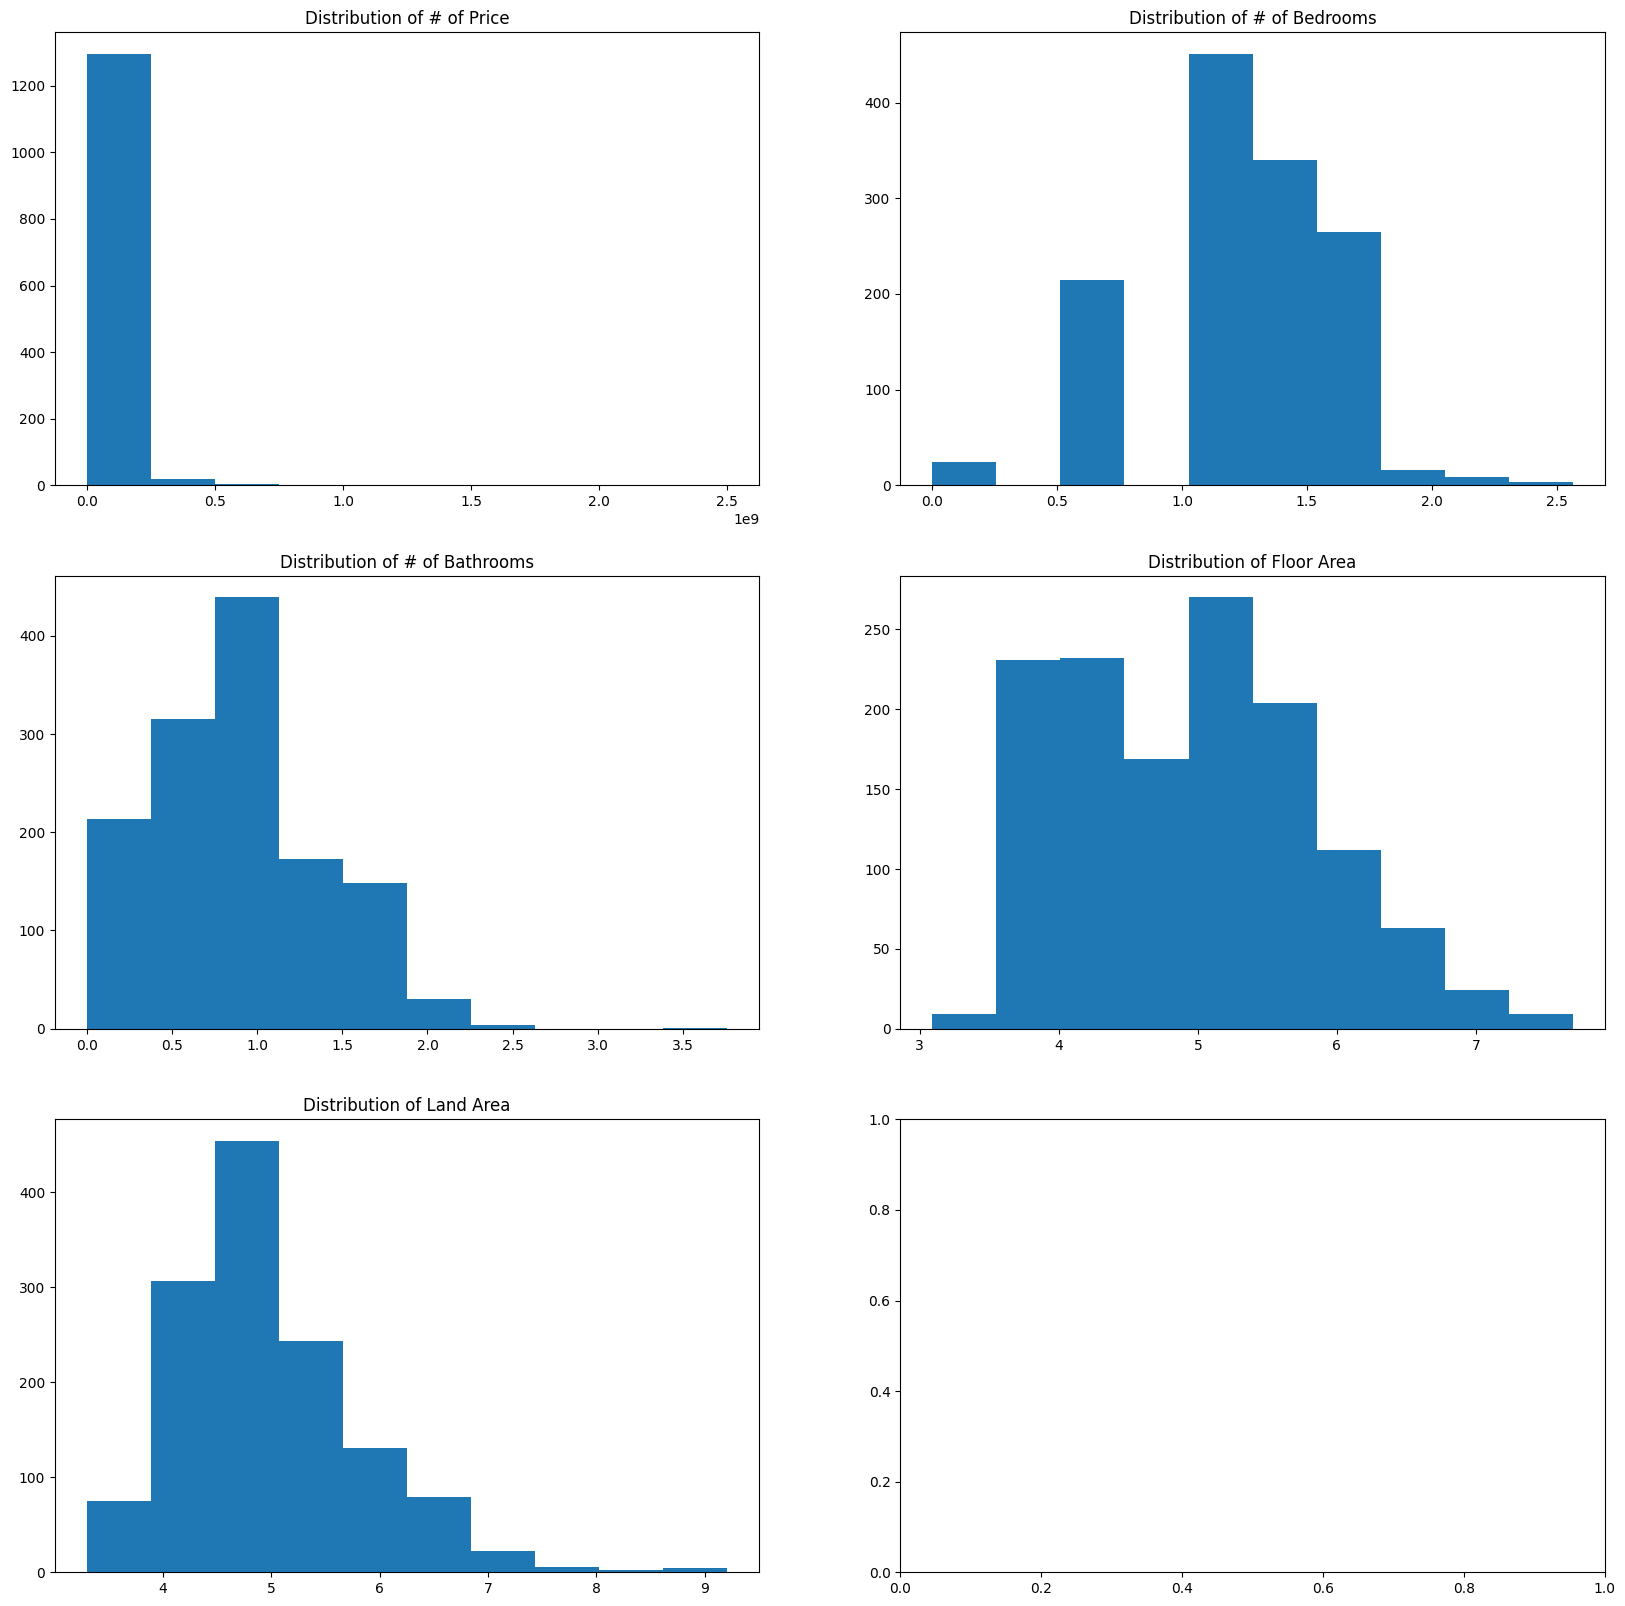

In [33]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

axes[0,0].hist(df_log['Price'])
axes[0,0].set_title('Distribution of # of Price')
axes[0,1].hist(df_log['Bedrooms'])
axes[0,1].set_title('Distribution of # of Bedrooms')
axes[1,0].hist(df_log['Bathrooms'])
axes[1,0].set_title('Distribution of # of Bathrooms')
axes[1,1].hist(df_log['Floor Area'])
axes[1,1].set_title('Distribution of Floor Area')
axes[2,0].hist(df_log['Land Area'])
axes[2,0].set_title('Distribution of Land Area')

plt.show()

In [34]:
df_log.to_csv(os.path.join("..", DATASET_INTERIM_PATH, "log_transformed.csv"), index=False)

After applying log transform on numerical features, the data became less positively skewed. The shape of the distribution became more refined. This will be helpful to possible reduce the impact of outliers.